In [1]:
import numpy as np
import py5

%load_ext py5

# Constants and Mapping Functions

In [2]:
TWO_PI_i = 2j * np.pi

def straight_to_curvy(h):
    out = h**(TWO_PI_i / (TWO_PI_i + np.log(256)))
#     out[np.isnan(out)] = 0
    return out

def curvy_to_straight(w):
    out = w**((TWO_PI_i + np.log(256)) / TWO_PI_i)
#     out[np.isnan(out)] = 0
    return out

# Complex Grid

In [3]:
def complex_grid(xcoords, ycoords):
    x, y = np.meshgrid(ycoords, xcoords)
    return x - y * 1j

def magnitude(coords):
    return (np.real(coords)**2 + np.imag(coords)**2)**0.5

# Make a Grid in the Twisted World

In [4]:
steps = 100
xstart, xstop, xsteps = -1/6, 2, steps
ystart, ystop, ysteps = -2/3, 2, steps

xcoords = np.linspace(xstart, xstop, xsteps)
ycoords = np.linspace(ystart, ystop, ysteps)
curvy = complex_grid(ycoords, xcoords)

# Convert Grid to Straight World

In [5]:
straight = curvy_to_straight(curvy)

# Visualize Transformed Grid

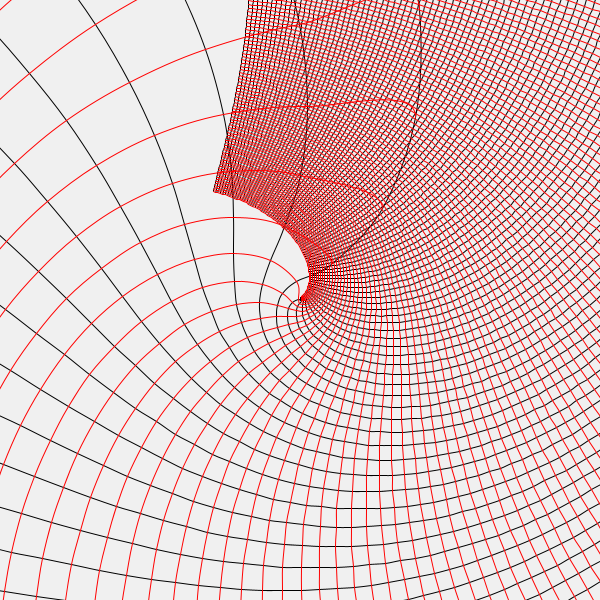

In [6]:
%%py5draw 600 600 --filename /tmp/curved_to_straight.png

py5.background(240)
py5.translate(py5.width / 2, py5.height / 2)
py5.no_fill()

ysize, xsize = straight.shape
scale = py5.width / 2
stepsize = 1

# horizontal lines
py5.stroke(0)
for y in range(1, ysize - 1, stepsize):
    for x in range(xsize - 3):
        a = scale * straight[y, x]
        b = scale * straight[y, x + 1]
        c = scale * straight[y, x + 2]
        d = scale * straight[y, x + 3]
        if np.isnan(a) or np.isnan(b) or np.isnan(c) or np.isnan(d):
            continue
        py5.curve(np.real(a), np.imag(a), np.real(b), np.imag(b),
                  np.real(c), np.imag(c), np.real(d), np.imag(d))

# vertical lines
py5.stroke(255, 0, 0)
for y in range(ysize - 3):
    for x in range(1, xsize - 1, stepsize):
        a = scale * straight[y, x]
        b = scale * straight[y + 1, x]
        c = scale * straight[y + 2, x]
        d = scale * straight[y + 3, x]
        if xcoords[x] <= 0 and -ycoords[y + 0] > 0 and -ycoords[y + 2] < 0:
            continue
        if np.isnan(a) or np.isnan(b) or np.isnan(c) or np.isnan(d):
            continue
        py5.curve(np.real(a), np.imag(a), np.real(b), np.imag(b),
                  np.real(c), np.imag(c), np.real(d), np.imag(d))
